In [1]:
install.packages("forecast")

package 'forecast' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Microsoft\AppData\Local\Temp\RtmpEXwkrz\downloaded_packages


In [2]:
library(forecast)

Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [3]:
install.packages("tseries")

package 'tseries' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tseries'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Microsoft\Anaconda3\Lib\R\library\00LOCK\tseries\libs\x64\tseries.dll to C:\Users\Microsoft\Anaconda3\Lib\R\library\tseries\libs\x64\tseries.dll: Permission denied"Warning message:
"restored 'tseries'"


The downloaded binary packages are in
	C:\Users\Microsoft\AppData\Local\Temp\RtmpEXwkrz\downloaded_packages


In [4]:
library(tseries)

Warning message:
"package 'tseries' was built under R version 3.6.3"

In [5]:
hourly_sentiment_series <- read.csv(file="hourly_users_sentiment_subset.csv",
                                    sep=",",
                                    row.names=1,
                                    header=TRUE)

In [6]:
head(hourly_sentiment_series)


,users_sentiment_score
2/6/2019 0:00,-0.000745
2/6/2019 1:00,-0.099152
2/6/2019 2:00,0.054502
2/6/2019 3:00,0.062236
2/6/2019 4:00,0.049438
2/6/2019 5:00,0.050184


#### Check data is indexed with rows/index as the datetime values

In [7]:
rownames(hourly_sentiment_series)

[1] "2/6/2019 0:00"  "2/6/2019 1:00"  "2/6/2019 2:00"  "2/6/2019 3:00" 
 [5] "2/6/2019 4:00"  "2/6/2019 5:00"  "2/6/2019 6:00"  "2/6/2019 7:00" 
 [9] "2/6/2019 8:00"  "2/6/2019 9:00"  "2/6/2019 10:00" "2/6/2019 11:00"
[13] "2/6/2019 12:00" "2/6/2019 13:00" "2/6/2019 14:00" "2/6/2019 15:00"
[17] "2/6/2019 16:00" "2/6/2019 17:00" "2/6/2019 18:00"

#### Preview the data to get an idea of the values and sample size



In [8]:
head(hourly_sentiment_series)
tail(hourly_sentiment_series)
dim(hourly_sentiment_series)

,users_sentiment_score
2/6/2019 0:00,-0.000745
2/6/2019 1:00,-0.099152
2/6/2019 2:00,0.054502
2/6/2019 3:00,0.062236
2/6/2019 4:00,0.049438
2/6/2019 5:00,0.050184


,users_sentiment_score
2/6/2019 13:00,-0.039446
2/6/2019 14:00,-0.002736
2/6/2019 15:00,-0.029604
2/6/2019 16:00,0.022578
2/6/2019 17:00,-0.005919
2/6/2019 18:00,-0.006468


[1] 19  1

#### Plot the data to check if stationary (constant mean and variance),

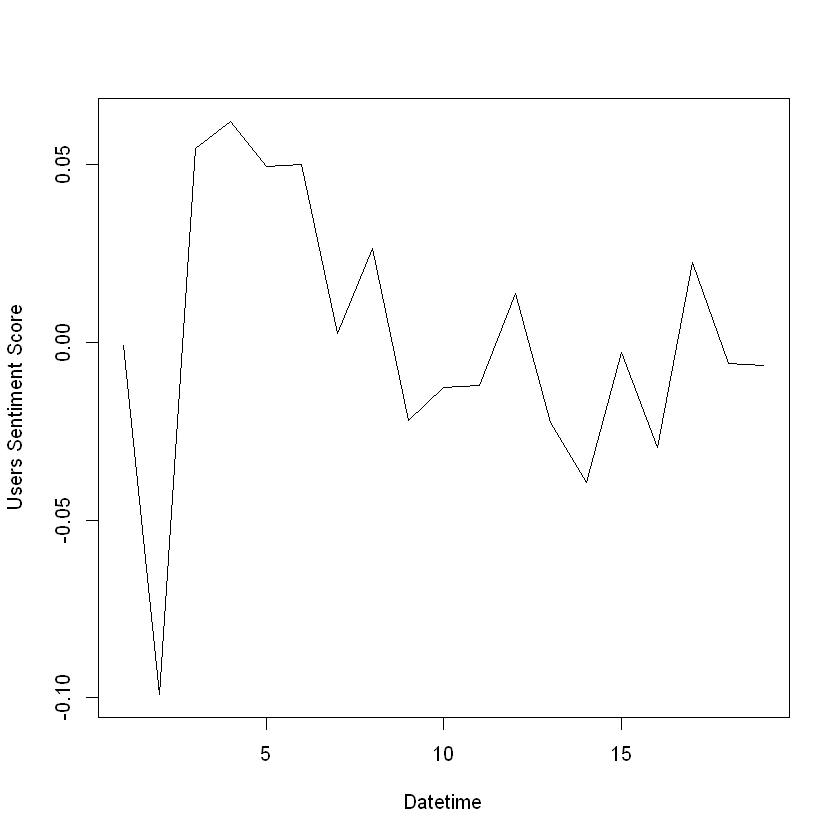

In [9]:
plot(hourly_sentiment_series$users_sentiment_score, type="l", xlab="Datetime", ylab="Users Sentiment Score")

#### Difference the data to make it more stationary and plot to check if the data looks more stationary

Differencing subtracts the next value by the current value Best not to over-difference the data, as this could lead to inaccurate estimates Make sure to leave no missing values, as this could cause  problems when modeling later

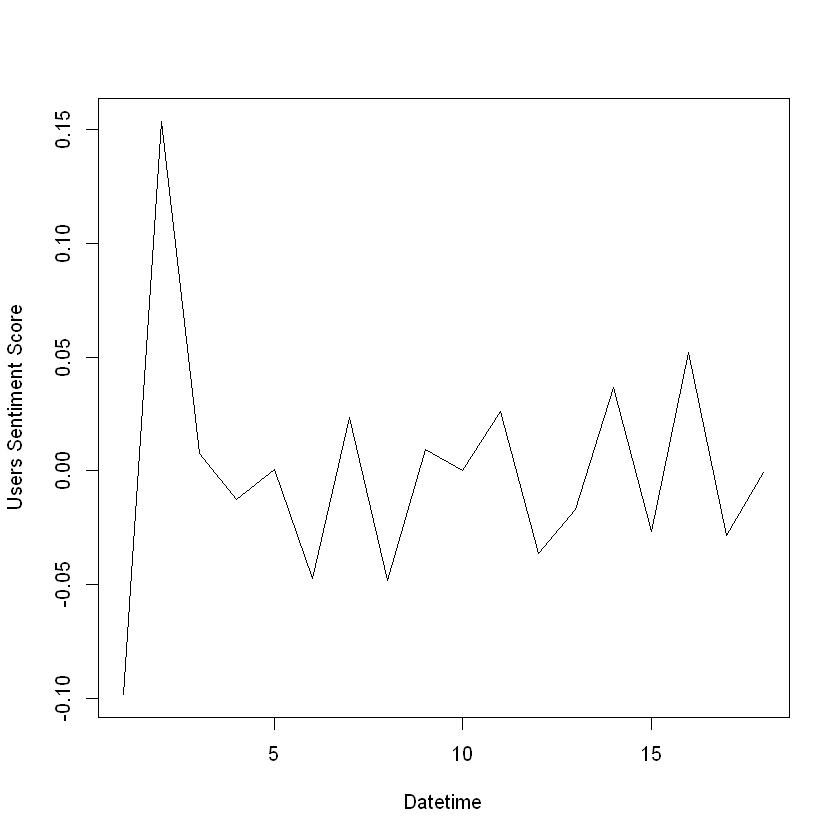

In [10]:
hourly_sentiment_series_diff1 <- diff(hourly_sentiment_series$users_sentiment_score)
plot(hourly_sentiment_series_diff1, type="l", xlab="Datetime", ylab="Users Sentiment Score")

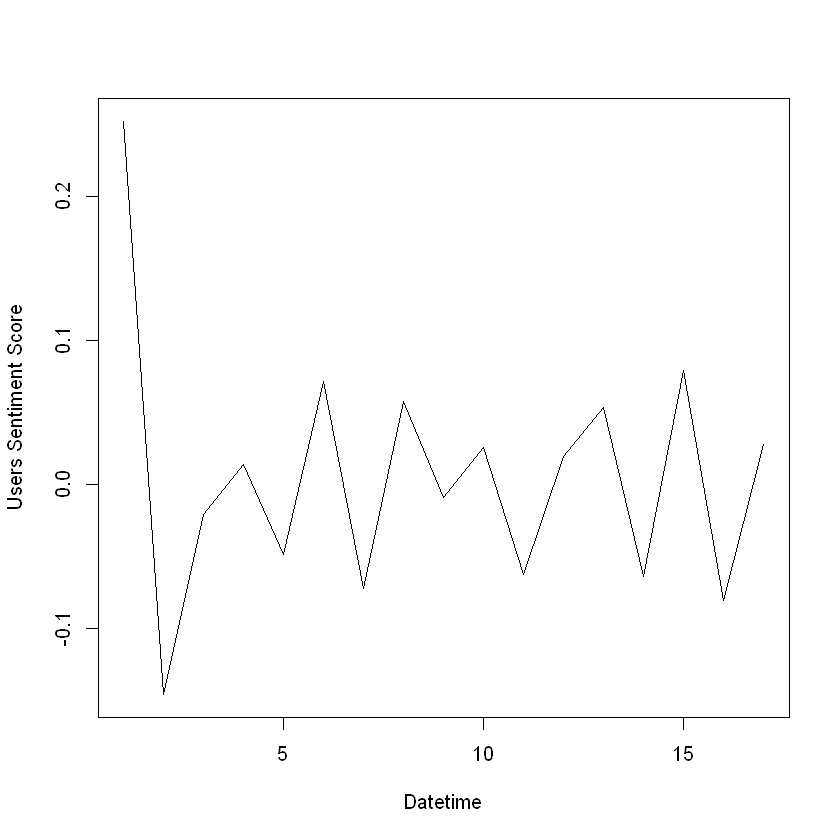

In [11]:
hourly_sentiment_series_diff2 = diff(hourly_sentiment_series_diff1)
plot(hourly_sentiment_series_diff2, type="l", xlab="Datetime", ylab="Users Sentiment Score")

 Check ACF and PACF plots to determine number of AR terms and  MA terms in ARMA model, or to spot seasonality/periodic trend Autoregressive forecast the next timestamp's value by regressing the previous values

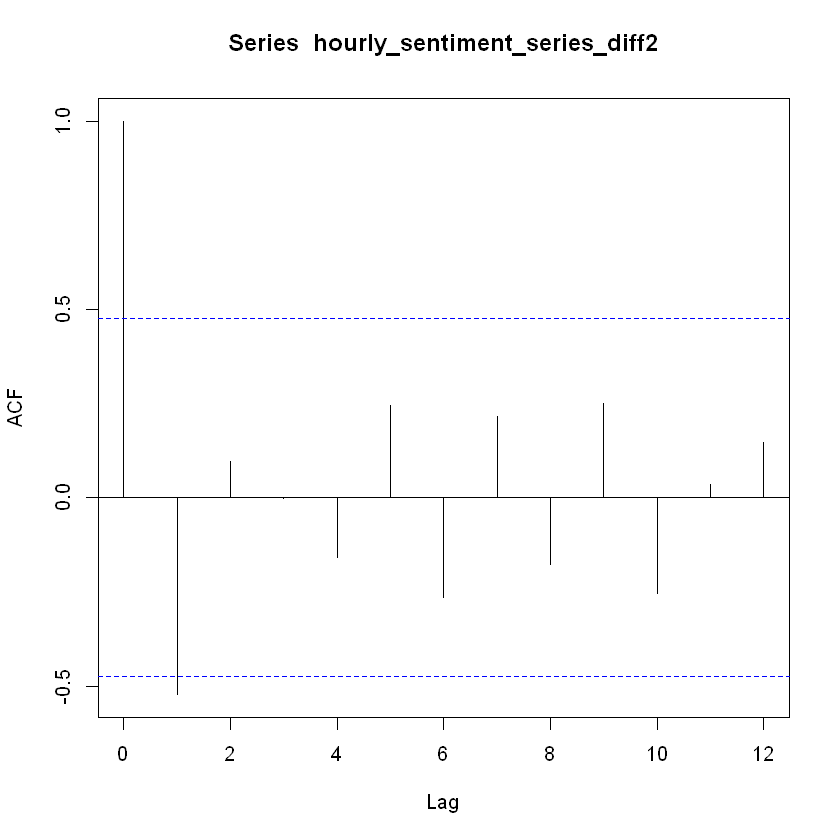

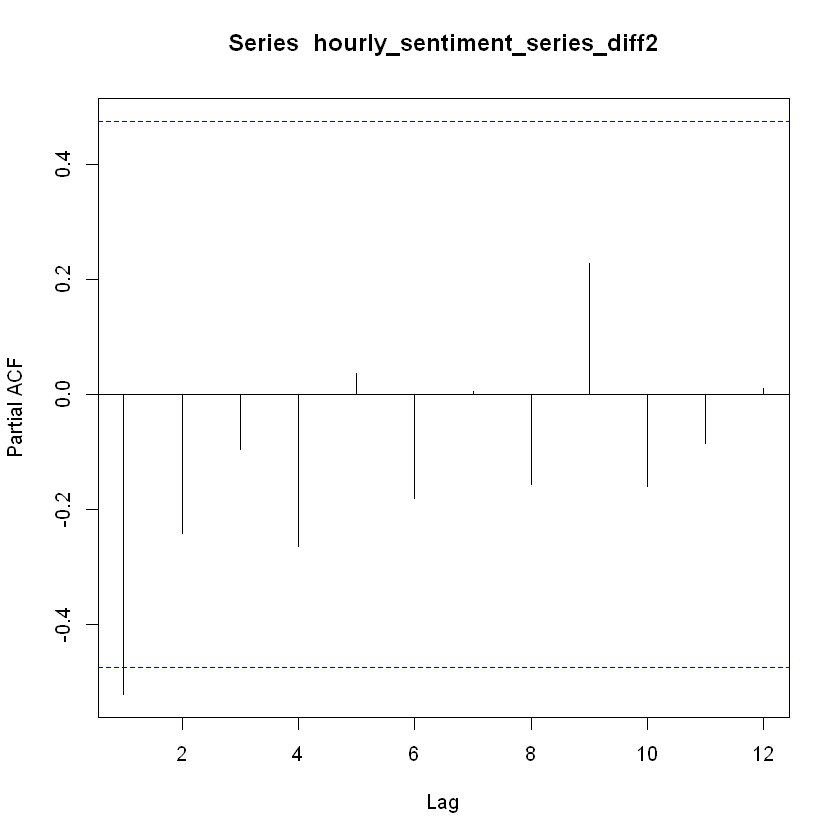

In [12]:
acf(hourly_sentiment_series_diff2)
pacf(hourly_sentiment_series_diff2)

 Autoregressive Integrated Moving Average is useful  for non-stationary data, plus has an additional seasonal differencing parameter for seasonal non-stationary data

#### Depending on ACF and PACF, create ARMA/ARIMA model with AR and MA terms auto.arima will automatically choose best terms

In [13]:
ARMA1model_hourly_sentiment <- auto.arima(hourly_sentiment_series, d=2)

#### If the p-value for a AR/MA coef is > 0.05, it's not significant

In [14]:
ARMA1model_hourly_sentiment

Series: hourly_sentiment_series 
ARIMA(2,2,0) 

Coefficients:
          ar1      ar2
      -1.2948  -0.6177
s.e.   0.2256   0.2437

sigma^2 estimated as 0.002803:  log likelihood=25.91
AIC=-45.81   AICc=-43.97   BIC=-43.31

# Predict the next 5 hours (5 time steps ahead), 

In [15]:
ARMA1predict_5hourly_sentiment <- predict(ARMA1model_hourly_sentiment, n.ahead=5)
ARMA1predict_5hourly_sentiment

ERROR while rich displaying an object: Error in if (many_rows) {: argument is of length zero

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_html.list(obj)
9. repr_list

$pred
Time Series:
Start = 20 
End = 24 
Frequency = 1 
[1]  0.0066351364 -0.0152033292 -0.0002329434 -0.0113376152 -0.0114188449

$se
Time Series:
Start = 20 
End = 24 
Frequency = 1 
[1] 0.05294000 0.06477973 0.10122119 0.13412009 0.16893789


Back transform so we can compare de-diff'd predicted values with the de-diff'd/original actual values This is automatically done when forecasting, so no need to  manually de-diff

 using cumulative sum with original data given

In [16]:
undiff1<-cumsum(c(hourly_sentiment_series_diff1[1],hourly_sentiment_series_diff2))
all(round(hourly_sentiment_series_diff1)==round(undiff1))

[1] TRUE

In [17]:
undiff2<-cumsum(c(hourly_sentiment_series$users_sentiment_score[1],undiff1))
all(round(undiff2,6)==round(hourly_sentiment_series,6)) #Note: very small differences
head(hourly_sentiment_series$users_sentiment_score)
head(undiff2)

[1] TRUE

[1] -0.000745 -0.099152  0.054502  0.062236  0.049438  0.050184

[1] -0.000745 -0.099152  0.054502  0.062236  0.049438  0.050184

#### Plot actual vs predicted First let's get 2 versions of the time series:  All values with the last 5 being actual values  All values with last 5 being predicted values

In [18]:
hourly_sentiment_full_actual <- read.csv(file="hourly_users_sentiment_sample.csv",
                                         sep=",",
                                         row.names=1,
                                         header=TRUE)

In [19]:
tail(hourly_sentiment_full_actual)
indx_row_values <- row.names(hourly_sentiment_full_actual)[20:24]
indx_row_values

,users_sentiment_score
2/6/2019 18:00,-0.006468
2/6/2019 19:00,-0.006840
2/6/2019 20:00,-0.057540
2/6/2019 21:00,-0.007990
2/6/2019 22:00,-0.008430
2/6/2019 23:00,-0.009340


[1] "2/6/2019 19:00" "2/6/2019 20:00" "2/6/2019 21:00" "2/6/2019 22:00"
[5] "2/6/2019 23:00"

In [20]:
ARMA1predict_5hourly_sentiment[[1]]

ERROR while rich displaying an object: Error in if (many_rows) {: argument is of length zero

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.ts(obj)
9. repr_ts_gen

In [21]:
predicted_df <- data.frame(indx_row_values,ARMA1predict_5hourly_sentiment[[1]])
hourly_sentiment_series_df <- read.csv(file="hourly_users_sentiment_subset.csv",
                                       sep=",",
                                       header=TRUE)

In [22]:
predicted_df <- setNames(predicted_df, names(hourly_sentiment_series_df))
hourly_sentiment_full_predicted <- rbind(hourly_sentiment_series_df,predicted_df)
hourly_sentiment_full_predicted <- data.frame(hourly_sentiment_full_predicted, row.names=1)
tail(hourly_sentiment_full_predicted)

,users_sentiment_score
2/6/2019 18:00,-0.0064680000
2/6/2019 19:00,0.0066351364
2/6/2019 20:00,-0.0152033292
2/6/2019 21:00,-0.0002329434
2/6/2019 22:00,-0.0113376152
2/6/2019 23:00,-0.0114188449


# Now let's plot actual vs predicted

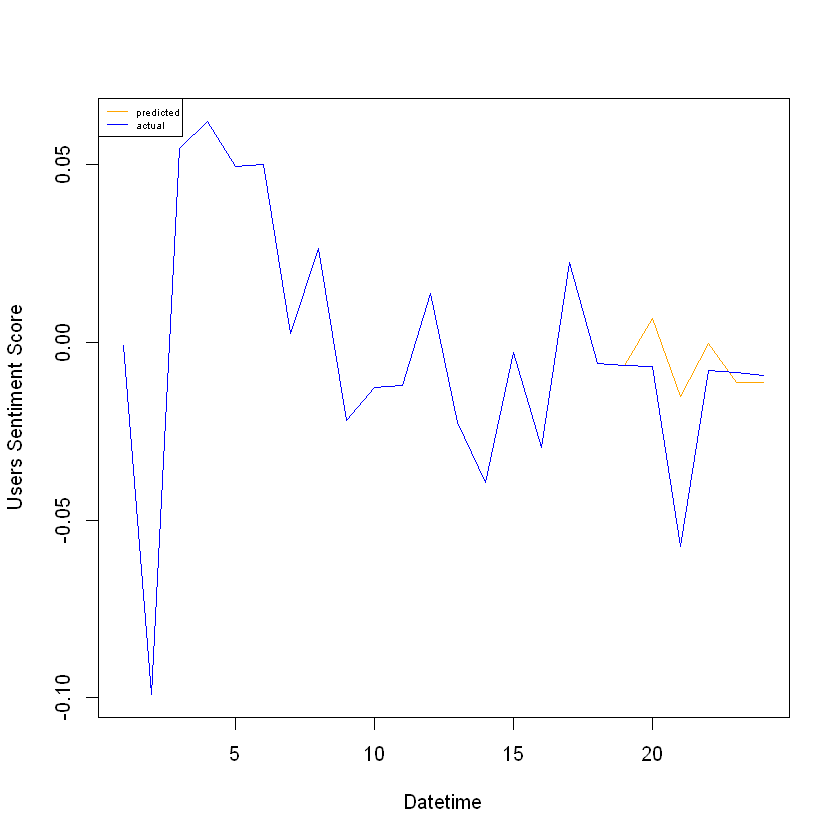

In [23]:
plot(hourly_sentiment_full_predicted$users_sentiment_score, type="l", col="orange", xlab="Datetime", ylab="Users Sentiment Score")
lines(hourly_sentiment_full_actual$users_sentiment_score, type="l", col="blue")
legend("topleft", legend=c("predicted", "actual"), col=c("orange", "blue"), lty=1, cex=0.5)